<b>1. Perform sentiment analysis on the amazon alexa reviews.(Data is TSV format)</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Embedding, Flatten, SimpleRNN, Bidirectional, LSTM, GRU
from tensorflow.keras.models import Sequential
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/alexa_reviews.tsv", sep="\t")

In [3]:
df.head()

,Unnamed: 0,verified_reviews,feedback
0,0,Love my Echo!,1
1,1,Loved it!,1
2,2,"Sometimes while playing a game, you can answer...",1
3,3,I have had a lot of fun with this thing. My 4 ...,1
4,4,Music,1


In [4]:
df.drop(["Unnamed: 0"],axis = 1,inplace=True)

In [5]:
df.shape

(3150, 2)

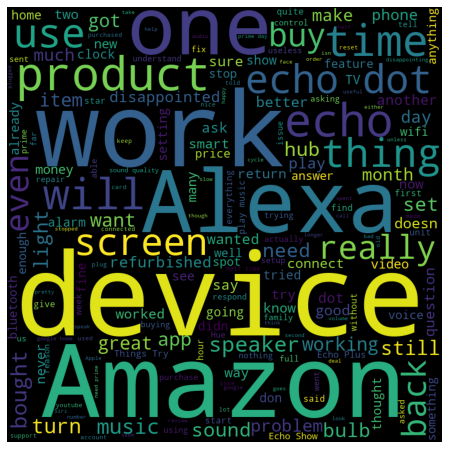

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ="black",  
               min_font_size = 10)

wc.generate("".join(df[df["feedback"]==0]["verified_reviews"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

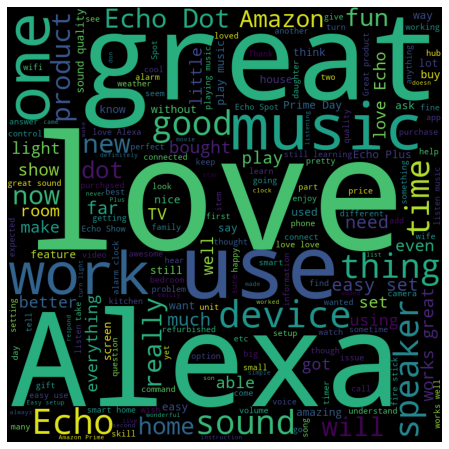

In [7]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ="black",  
               min_font_size = 10)

wc.generate("".join(df[df["feedback"]==1]["verified_reviews"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [8]:
X = df["verified_reviews"]
y = df["feedback"]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Tokenization

In [10]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)

In [11]:
doc_length = []
for doc in train_sequences:
  doc_length.append(len(doc))

In [12]:
max(doc_length)

555

In [13]:
np.quantile(doc_length,0.95)

88.0

In [14]:
max_len = 88
train_padded = pad_sequences(train_sequences, maxlen=max_len)
print(train_padded)

[[   0    0    0 ...   17   40   85]
 [   0    0    0 ...    0   22 1323]
 [   0    0    0 ...    0  323   25]
 ...
 [   0    0    0 ...  336   17   51]
 [   0    0    0 ...    0  619  577]
 [   0    0    0 ...    2   13  141]]


In [15]:
vocab_len = len(tokenizer.index_word)+1

In [16]:
# NN
model = Sequential()
model.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model.add(Flatten())
model.add(Dense(8, activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [17]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [18]:
model.fit(train_padded,y_train,epochs=30,batch_size=50)

Epoch 1/30
51/51 [==============================] - 1s 2ms/step - loss: 0.3605
Epoch 2/30
51/51 [==============================] - 0s 2ms/step - loss: 0.2718
Epoch 3/30
51/51 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 4/30
51/51 [==============================] - 0s 3ms/step - loss: 0.2413
Epoch 5/30
51/51 [==============================] - 0s 2ms/step - loss: 0.2051
Epoch 6/30
51/51 [==============================] - 0s 2ms/step - loss: 0.1527
Epoch 7/30
51/51 [==============================] - 0s 2ms/step - loss: 0.1086
Epoch 8/30
51/51 [==============================] - 0s 2ms/step - loss: 0.0788
Epoch 9/30
51/51 [==============================] - 0s 2ms/step - loss: 0.0602
Epoch 10/30
51/51 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 11/30
51/51 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 12/30
51/51 [==============================] - 0s 2ms/step - loss: 0.0344
Epoch 13/30
51/51 [==============================

In [19]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

In [20]:
y_pred = model.predict(test_padded)
y_pred = np.where(y_pred >= 0.5,1,0)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54        46
           1       0.96      0.99      0.97       584

    accuracy                           0.95       630
   macro avg       0.84      0.71      0.76       630
weighted avg       0.94      0.95      0.94       630



## RNN.

In [23]:
# RNN with Multiple layer

model2 = Sequential()
model2.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model2.add(SimpleRNN(32, activation="tanh", return_sequences=True))
model2.add(SimpleRNN(32, activation="tanh"))
model2.add(Dense(16, activation="tanh"))
model2.add(Dense(1,activation="sigmoid"))

In [24]:
model2.compile(loss="binary_crossentropy", optimizer="adam")
model2.fit(train_padded,y_train,epochs=20,batch_size=50)

Epoch 1/20
51/51 [==============================] - 5s 62ms/step - loss: 0.3728
Epoch 2/20
51/51 [==============================] - 3s 61ms/step - loss: 0.2964
Epoch 3/20
51/51 [==============================] - 3s 61ms/step - loss: 0.2844
Epoch 4/20
51/51 [==============================] - 3s 61ms/step - loss: 0.2596
Epoch 5/20
51/51 [==============================] - 3s 61ms/step - loss: 0.1574
Epoch 6/20
51/51 [==============================] - 3s 62ms/step - loss: 0.0725
Epoch 7/20
51/51 [==============================] - 3s 62ms/step - loss: 0.0387
Epoch 8/20
51/51 [==============================] - 3s 63ms/step - loss: 0.0265
Epoch 9/20
51/51 [==============================] - 3s 63ms/step - loss: 0.0220
Epoch 10/20
51/51 [==============================] - 3s 62ms/step - loss: 0.0204
Epoch 11/20
51/51 [==============================] - 3s 63ms/step - loss: 0.0195
Epoch 12/20
51/51 [==============================] - 3s 64ms/step - loss: 0.0189
Epoch 13/20
51/51 [==================

In [25]:
y_pred = model2.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.33      0.39        46
           1       0.95      0.97      0.96       584

    accuracy                           0.93       630
   macro avg       0.72      0.65      0.67       630
weighted avg       0.91      0.93      0.92       630



In [26]:
# Bidirectional RNN with Multiple layer

model3 = Sequential()
model3.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model3.add(Bidirectional(SimpleRNN(32, activation="tanh", return_sequences=True)))
model3.add(Bidirectional(SimpleRNN(32, activation="tanh")))
model3.add(Dense(16, activation="tanh"))
model3.add(Dense(1,activation="sigmoid"))

In [27]:
model3.compile(loss="binary_crossentropy", optimizer="adam")
model3.fit(train_padded,y_train,epochs=20,batch_size=50)

Epoch 1/20
51/51 [==============================] - 10s 113ms/step - loss: 0.3519
Epoch 2/20
51/51 [==============================] - 6s 112ms/step - loss: 0.2739
Epoch 3/20
51/51 [==============================] - 6s 112ms/step - loss: 0.1826
Epoch 4/20
51/51 [==============================] - 6s 112ms/step - loss: 0.0978
Epoch 5/20
51/51 [==============================] - 6s 113ms/step - loss: 0.0444
Epoch 6/20
51/51 [==============================] - 6s 110ms/step - loss: 0.0300
Epoch 7/20
51/51 [==============================] - 6s 109ms/step - loss: 0.0244
Epoch 8/20
51/51 [==============================] - 6s 111ms/step - loss: 0.0218
Epoch 9/20
51/51 [==============================] - 6s 111ms/step - loss: 0.0205
Epoch 10/20
51/51 [==============================] - 6s 114ms/step - loss: 0.0197
Epoch 11/20
51/51 [==============================] - 6s 112ms/step - loss: 0.0191
Epoch 12/20
51/51 [==============================] - 6s 110ms/step - loss: 0.0186
Epoch 13/20
51/51 [=====

In [28]:
y_pred = model3.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.37      0.46        46
           1       0.95      0.98      0.97       584

    accuracy                           0.94       630
   macro avg       0.78      0.68      0.71       630
weighted avg       0.93      0.94      0.93       630



## LSTM

In [29]:
# LSTM with multiple layer

model4 = Sequential()
model4.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model4.add(LSTM(32, activation="tanh", return_sequences=True))
model4.add(LSTM(32, activation="tanh"))
model4.add(Dense(16, activation="tanh"))
model4.add(Dense(1,activation="sigmoid"))

In [30]:
model4.compile(loss="binary_crossentropy", optimizer="adam")
model4.fit(train_padded,y_train,epochs=50,batch_size=100)

Epoch 1/50
26/26 [==============================] - 12s 145ms/step - loss: 0.5319
Epoch 2/50
26/26 [==============================] - 4s 139ms/step - loss: 0.3512
Epoch 3/50
26/26 [==============================] - 4s 137ms/step - loss: 0.3149
Epoch 4/50
26/26 [==============================] - 4s 136ms/step - loss: 0.2976
Epoch 5/50
26/26 [==============================] - 4s 137ms/step - loss: 0.2862
Epoch 6/50
26/26 [==============================] - 4s 137ms/step - loss: 0.2784
Epoch 7/50
26/26 [==============================] - 4s 134ms/step - loss: 0.2695
Epoch 8/50
26/26 [==============================] - 4s 136ms/step - loss: 0.2570
Epoch 9/50
26/26 [==============================] - 4s 136ms/step - loss: 0.2494
Epoch 10/50
26/26 [==============================] - 3s 134ms/step - loss: 0.2321
Epoch 11/50
26/26 [==============================] - 4s 138ms/step - loss: 0.1757
Epoch 12/50
26/26 [==============================] - 4s 137ms/step - loss: 0.1356
Epoch 13/50
26/26 [=====

In [31]:
y_pred = model4.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65        46
           1       0.97      0.98      0.98       584

    accuracy                           0.95       630
   macro avg       0.85      0.78      0.81       630
weighted avg       0.95      0.95      0.95       630



In [32]:
# LSTM Bidirectional with multiple layer

model5 = Sequential()
model5.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model5.add(Bidirectional(LSTM(32, activation="tanh", return_sequences=True)))
model5.add(Bidirectional(LSTM(32, activation="tanh")))
model5.add(Dense(16, activation="tanh"))
model5.add(Dense(1,activation="sigmoid"))

In [33]:
model5.compile(loss="binary_crossentropy", optimizer="adam")
model5.fit(train_padded,y_train,epochs=50,batch_size=100)

Epoch 1/50
26/26 [==============================] - 20s 235ms/step - loss: 0.5188
Epoch 2/50
26/26 [==============================] - 6s 231ms/step - loss: 0.3360
Epoch 3/50
26/26 [==============================] - 6s 239ms/step - loss: 0.2866
Epoch 4/50
26/26 [==============================] - 6s 232ms/step - loss: 0.2012
Epoch 5/50
26/26 [==============================] - 6s 234ms/step - loss: 0.1204
Epoch 6/50
26/26 [==============================] - 6s 239ms/step - loss: 0.0797
Epoch 7/50
26/26 [==============================] - 6s 231ms/step - loss: 0.0750
Epoch 8/50
26/26 [==============================] - 6s 241ms/step - loss: 0.0506
Epoch 9/50
26/26 [==============================] - 6s 239ms/step - loss: 0.0376
Epoch 10/50
26/26 [==============================] - 6s 236ms/step - loss: 0.0330
Epoch 11/50
26/26 [==============================] - 6s 232ms/step - loss: 0.0294
Epoch 12/50
26/26 [==============================] - 6s 233ms/step - loss: 0.0273
Epoch 13/50
26/26 [=====

In [34]:
y_pred = model5.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        46
           1       0.97      0.99      0.98       584

    accuracy                           0.96       630
   macro avg       0.87      0.79      0.82       630
weighted avg       0.95      0.96      0.95       630



## GRU

In [35]:
# GRU with single Layer

model6 = Sequential()
model6.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model6.add(GRU(32, activation="tanh"))
model6.add(Dense(16, activation="tanh"))
model6.add(Dense(1,activation="sigmoid"))

In [36]:
model6.compile(loss="binary_crossentropy", optimizer="adam")
model6.fit(train_padded,y_train,epochs=50,batch_size=150)

Epoch 1/50
17/17 [==============================] - 5s 71ms/step - loss: 0.6370
Epoch 2/50
17/17 [==============================] - 1s 73ms/step - loss: 0.4433
Epoch 3/50
17/17 [==============================] - 1s 72ms/step - loss: 0.3125
Epoch 4/50
17/17 [==============================] - 1s 76ms/step - loss: 0.2839
Epoch 5/50
17/17 [==============================] - 1s 72ms/step - loss: 0.2640
Epoch 6/50
17/17 [==============================] - 1s 70ms/step - loss: 0.2396
Epoch 7/50
17/17 [==============================] - 1s 71ms/step - loss: 0.2124
Epoch 8/50
17/17 [==============================] - 1s 71ms/step - loss: 0.1796
Epoch 9/50
17/17 [==============================] - 1s 72ms/step - loss: 0.1459
Epoch 10/50
17/17 [==============================] - 1s 70ms/step - loss: 0.1135
Epoch 11/50
17/17 [==============================] - 1s 78ms/step - loss: 0.0867
Epoch 12/50
17/17 [==============================] - 1s 70ms/step - loss: 0.0677
Epoch 13/50
17/17 [==================

In [37]:
y_pred = model6.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        46
           1       0.96      0.98      0.97       584

    accuracy                           0.95       630
   macro avg       0.83      0.75      0.79       630
weighted avg       0.94      0.95      0.95       630



In [38]:
# GRU with multiple layer

model7 = Sequential()
model7.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model7.add(GRU(32, activation="tanh", return_sequences=True))
model7.add(GRU(32, activation="tanh"))
model7.add(Dense(16, activation="tanh"))
model7.add(Dense(1,activation="sigmoid"))

In [39]:
model7.compile(loss="binary_crossentropy", optimizer="adam")
model7.fit(train_padded,y_train,epochs=50,batch_size=150)

Epoch 1/50
17/17 [==============================] - 10s 143ms/step - loss: 0.5654
Epoch 2/50
17/17 [==============================] - 2s 143ms/step - loss: 0.3261
Epoch 3/50
17/17 [==============================] - 2s 141ms/step - loss: 0.2969
Epoch 4/50
17/17 [==============================] - 2s 144ms/step - loss: 0.2759
Epoch 5/50
17/17 [==============================] - 2s 142ms/step - loss: 0.2476
Epoch 6/50
17/17 [==============================] - 2s 142ms/step - loss: 0.2036
Epoch 7/50
17/17 [==============================] - 2s 142ms/step - loss: 0.1393
Epoch 8/50
17/17 [==============================] - 2s 145ms/step - loss: 0.0904
Epoch 9/50
17/17 [==============================] - 2s 143ms/step - loss: 0.0659
Epoch 10/50
17/17 [==============================] - 2s 147ms/step - loss: 0.0476
Epoch 11/50
17/17 [==============================] - 2s 141ms/step - loss: 0.0364
Epoch 12/50
17/17 [==============================] - 2s 143ms/step - loss: 0.0297
Epoch 13/50
17/17 [=====

In [40]:
y_pred = model7.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.63        46
           1       0.97      0.98      0.97       584

    accuracy                           0.95       630
   macro avg       0.84      0.77      0.80       630
weighted avg       0.95      0.95      0.95       630



In [41]:
# Bidirectional GRU with single layer

model8 = Sequential()
model8.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model8.add(Bidirectional(GRU(32, activation="tanh")))
model8.add(Dense(16, activation="tanh"))
model8.add(Dense(1,activation="sigmoid"))

In [42]:
model8.compile(loss="binary_crossentropy", optimizer="adam")
model8.fit(train_padded,y_train,epochs=50,batch_size=150)

Epoch 1/50
17/17 [==============================] - 9s 122ms/step - loss: 0.5896
Epoch 2/50
17/17 [==============================] - 2s 122ms/step - loss: 0.3507
Epoch 3/50
17/17 [==============================] - 2s 125ms/step - loss: 0.2925
Epoch 4/50
17/17 [==============================] - 2s 128ms/step - loss: 0.2687
Epoch 5/50
17/17 [==============================] - 2s 124ms/step - loss: 0.2460
Epoch 6/50
17/17 [==============================] - 2s 129ms/step - loss: 0.2159
Epoch 7/50
17/17 [==============================] - 2s 123ms/step - loss: 0.1741
Epoch 8/50
17/17 [==============================] - 2s 125ms/step - loss: 0.1234
Epoch 9/50
17/17 [==============================] - 2s 125ms/step - loss: 0.0832
Epoch 10/50
17/17 [==============================] - 2s 125ms/step - loss: 0.0597
Epoch 11/50
17/17 [==============================] - 2s 123ms/step - loss: 0.0458
Epoch 12/50
17/17 [==============================] - 2s 124ms/step - loss: 0.0375
Epoch 13/50
17/17 [======

In [43]:
y_pred = model8.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64        46
           1       0.97      0.97      0.97       584

    accuracy                           0.95       630
   macro avg       0.81      0.80      0.80       630
weighted avg       0.95      0.95      0.95       630



In [44]:
# Bidirectional GRU with multiple layer

model9 = Sequential()
model9.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model9.add(Bidirectional(GRU(32, activation="tanh", return_sequences=True)))
model9.add(Bidirectional(GRU(32, activation="tanh")))
model9.add(Dense(16, activation="tanh"))
model9.add(Dense(1,activation="sigmoid"))

In [45]:
model9.compile(loss="binary_crossentropy", optimizer="adam")
model9.fit(train_padded,y_train,epochs=50,batch_size=150)

Epoch 1/50
17/17 [==============================] - 19s 259ms/step - loss: 0.5217
Epoch 2/50
17/17 [==============================] - 4s 261ms/step - loss: 0.3229
Epoch 3/50
17/17 [==============================] - 4s 259ms/step - loss: 0.2885
Epoch 4/50
17/17 [==============================] - 4s 263ms/step - loss: 0.2654
Epoch 5/50
17/17 [==============================] - 4s 259ms/step - loss: 0.2224
Epoch 6/50
17/17 [==============================] - 4s 260ms/step - loss: 0.1463
Epoch 7/50
17/17 [==============================] - 4s 260ms/step - loss: 0.0839
Epoch 8/50
17/17 [==============================] - 4s 260ms/step - loss: 0.0527
Epoch 9/50
17/17 [==============================] - 4s 263ms/step - loss: 0.0398
Epoch 10/50
17/17 [==============================] - 5s 267ms/step - loss: 0.0306
Epoch 11/50
17/17 [==============================] - 4s 260ms/step - loss: 0.0261
Epoch 12/50
17/17 [==============================] - 4s 263ms/step - loss: 0.0231
Epoch 13/50
17/17 [=====

In [46]:
y_pred = model9.predict(test_padded)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68        46
           1       0.97      0.99      0.98       584

    accuracy                           0.96       630
   macro avg       0.88      0.79      0.83       630
weighted avg       0.96      0.96      0.96       630

